# How K-Nearest Neighbors (KNN) Works

##### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from time import time

##### Making functions for visuals/plotting

In [2]:
theme = '#E2E2E2' # theme base color

def set_theme():
    return ax.set_facecolor(theme), \
    ax.grid(True, alpha=4e-1, color='white'), \
    ax.set_axisbelow(True)

##### Generating and visualizing data points

In [3]:
X_train, y_train = make_blobs(n_samples=300, centers=4, 
                              n_features=2, random_state=9, cluster_std=2)

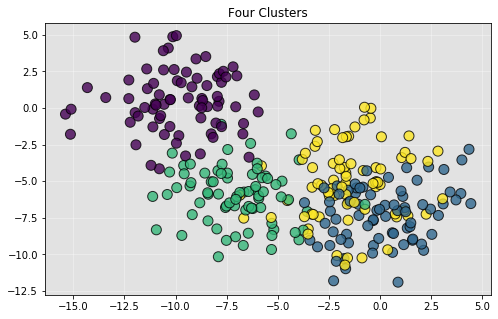

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=.8, 
           edgecolor='k', s=1e2)
set_theme()
title = plt.title('Four Clusters')

##### Generating and visualizing test data points

In [5]:
X_test, y_test = make_blobs(n_samples=75, center_box=(-5, -5), 
                            n_features=2, random_state=92, cluster_std=4)

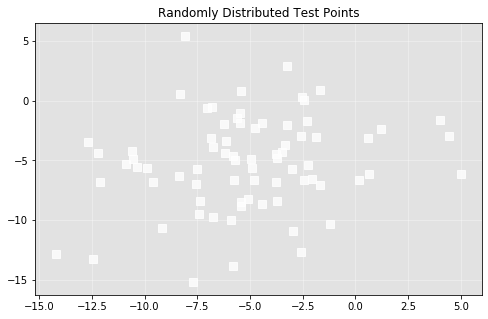

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], color='White', marker='s', 
           s=50, alpha=0.8)
set_theme()
title = plt.title('Four Clusters')
title = plt.title('Randomly Distributed Test Points')

##### Visualizing all data points

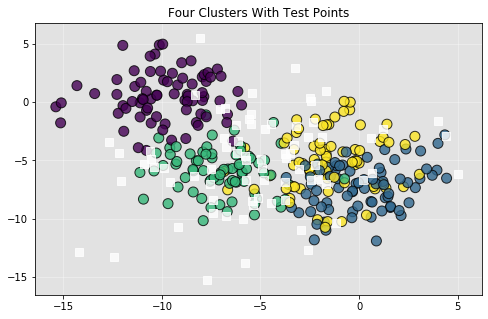

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=.8, edgecolor='k', s=1e2)
plt.scatter(X_test[:, 0], X_test[:, 1], color='White', 
            marker='s', s=5e1, alpha=8e-1)
set_theme()
title = plt.title('Four Clusters With Test Points')

The white squares will be the test data; we will try to predict which category they'd belong to, using K-Nearest Neighbors. KNN is simple, you pick a number (k), and a given point will inherit the class of its k nearest neighbors

##### Getting all the points into a dataframe (excluding the test points), and shuffling

In [8]:
df = pd.DataFrame(X_train, columns = ['X', 'Y']).sample(frac=1).reset_index(drop=True)
df.head()

,X,Y
0,-2.138996,-10.465667
1,-12.281326,1.916112
2,-2.270509,-11.796353
3,-5.929851,-6.165304
4,-5.497467,-4.811063


##### The test points

In [9]:
df_test = pd.DataFrame(X_test, columns = ['X', 'Y'])
df_test.head()

,X,Y
0,-2.438741,0.051713
1,-10.891797,-5.286429
2,-8.058688,5.457555
3,0.611604,-3.083663
4,-4.916235,-5.612527


##### Plotting the graph, with the (classified) test points 

We will use 10 nearest neighbors

In [10]:
h = .005  # step size in the mesh
n_neighbors = 10

In [11]:
start_timer = time()
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
stop_timer = time()
print('total duration: {}'.format(int(stop_timer-start_timer)/60), 'minutes')

total duration: 0.0 minutes


In [12]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [13]:
Z = Z.reshape(xx.shape)

##### Plotting train/test data points with the decision boundary

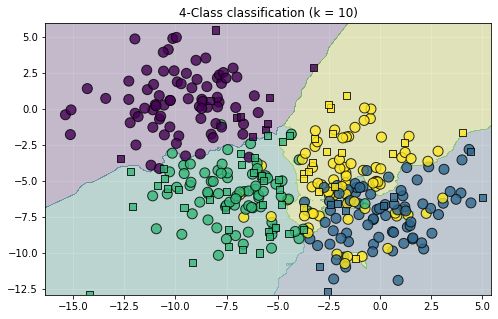

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=.2)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', 
            s=1e2, alpha=8e-1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
set_theme()
plt.show()

The KNN algorithm assigns to a point the most frequent class of the 10 nearest points

##### Visualizing only the test points

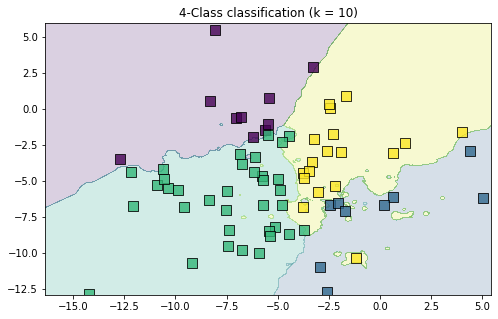

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=.2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=1e2, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

##### Same thing with __ONE__ nearest neighbor

In [16]:
h = .005  # step size in the mesh
n_neighbors = 1

In [17]:
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [18]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [19]:
Z = Z.reshape(xx.shape)

##### Plotting train/test data points with the decision boundary

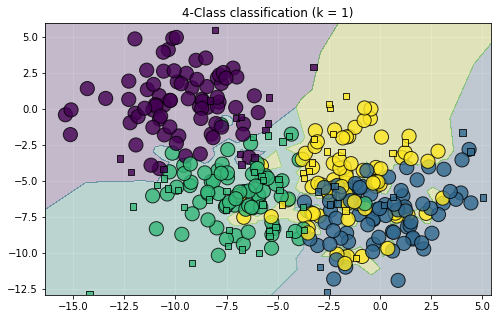

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=2e-1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            alpha=8e-1, edgecolor='k', s=2e2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=40, marker='s', alpha=8e-1)
plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
set_theme()
plt.show()

The KNN algorithm assigns to a point the most frequent class of the 1 nearest point

##### Visualizing only the test points

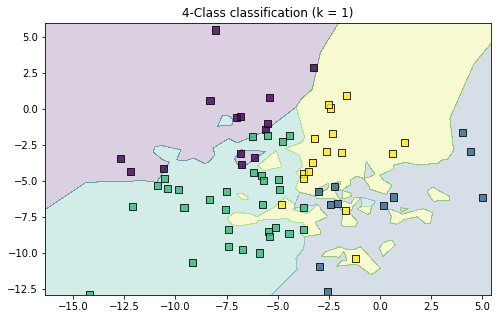

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=2e-1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

It overfits the data

##### Same thing with __FIVE__ nearest neighbors

In [22]:
h = .005  # step size in the mesh
n_neighbors = 5

In [23]:
start_timer = time()
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
stop_timer = time()
print('total duration: {}'.format(int(stop_timer-start_timer)/60), 'minutes')

total duration: 0.0 minutes


In [24]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
Z = Z.reshape(xx.shape)

##### Plotting train/test data points with the decision boundary

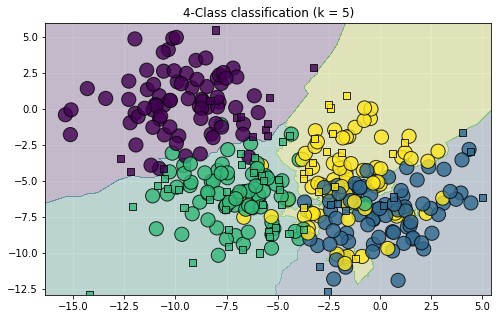

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=2e-1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', 
           s=2e2, alpha=8e-1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
set_theme()
plt.show()

The KNN algorithm assigns to a point the most frequent class of the 5 nearest points

##### Visualizing only the test points

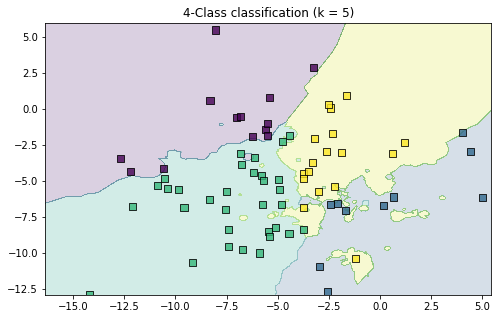

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=2e-1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

It overfits the data

##### Same thing with clearly __DISTINCT__ blobs

In [28]:
X_train, y_train = make_blobs(n_samples=300, centers=4, 
                              n_features=2, random_state=13, cluster_std=1)

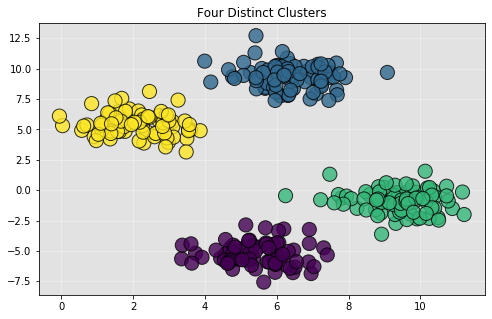

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=.8, 
           edgecolor='k', s=2e2)
set_theme()
title = plt.title('Four Distinct Clusters')

##### Generating and visualizing test data points

In [30]:
X_test, y_test = make_blobs(n_samples=75, center_box=(6, 0), 
                            n_features=2, random_state=1, cluster_std=3)

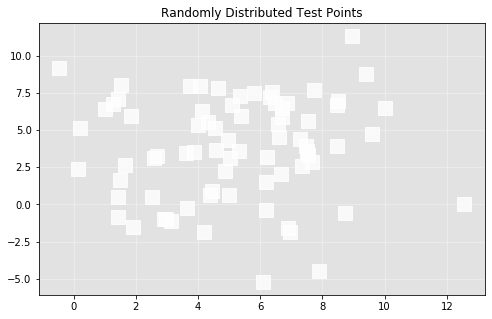

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], color='White', marker='s', 
           s=2e2, alpha=0.8)
set_theme()
title = plt.title('Four Clusters')
title = plt.title('Randomly Distributed Test Points')

##### Visualizing all data points

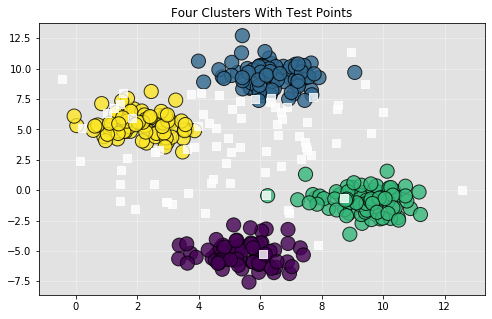

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=.8, 
           edgecolor='k', s=2e2)
ax.scatter(X_test[:, 0], X_test[:, 1], color='White', 
            marker='s', s=5e1, alpha=0.8)
set_theme()
title = plt.title('Four Clusters With Test Points')

The white squares will be the test data; we will try to predict which category they'd belong to, using K-Nearest Neighbors. KNN is simple, you pick a number (k), and a given point will inherit the class of its k nearest neighbors

##### Getting all the points into a dataframe (excluding the test points), and shuffling

In [33]:
df = pd.DataFrame(X_train, columns = ['X', 'Y']).sample(frac=1).reset_index(drop=True)
df.head()

,X,Y
0,3.119453,4.363842
1,2.381813,4.782825
2,9.077655,9.689752
3,8.832838,0.281580
4,6.368331,10.415820


##### The test points

In [34]:
df_test = pd.DataFrame(X_test, columns = ['X', 'Y'])
df_test.head()

,X,Y
0,3.624509,3.426499
1,7.464868,3.959289
2,7.657947,2.867421
3,3.987327,5.318696
4,0.145937,2.381300


##### Plotting the graph, with the (classified) test points 

We will use 5 nearest neighbors

In [35]:
h = .005  # step size in the mesh
n_neighbors = 5

In [36]:
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [37]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [38]:
Z = Z.reshape(xx.shape)

##### Plotting train/test data points with the decision boundary

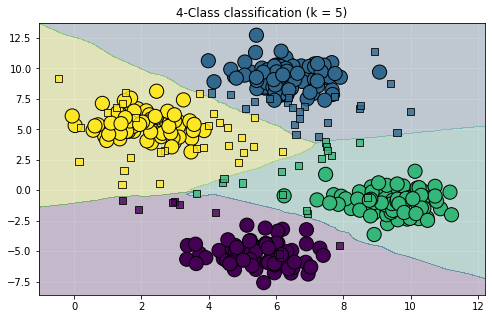

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=2e-1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', 
           s=2e2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
set_theme()
plt.show()

The KNN algorithm assigns to a point the most frequent class of the 5 nearest points

##### Visualizing only the test points

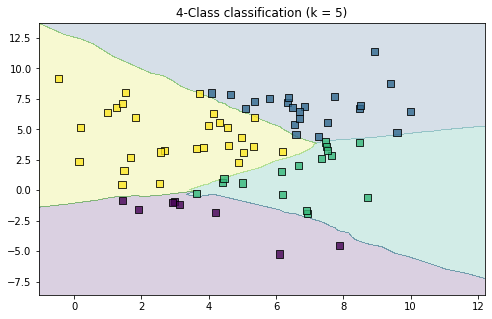

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, Z, alpha=2e-1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), edgecolor='k', 
            s=5e1, marker='s', alpha=8e-1)
title = plt.title("4-Class classification (k = %i)"%n_neighbors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()